In [1]:
import pandas as pd
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option('display.max_colwidth',None)
import re
import ast
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [273]:
df = pd.read_excel ('Tier B.xlsx')

In [274]:
a=['countyId','zipcode', 'zestimate','lotAreaValue',
       'rentZestimate','bedrooms', 'bathrooms', 'livingAreaValue', 
       'lastSoldPrice', 'zestimateLowPercent', 'zestimateHighPercent',
       'restimateLowPercent', 'restimateHighPercent', 
       'taxAssessedValue', 'taxAssessedYear', 
       'propertyTaxRate',  
       'resoFacts_hasFireplace', 'resoFacts_parking',
       'mortgageRates_thirtyYearFixedRate',
       'mortgageRates_fifteenYearFixedRate', 'mortgageRates_arm5Rate', 
    'city', 'county' , 'description','parentRegion_name',
    'dateSoldString', 'resoFacts_daysOnZillow', 'resoFacts_flooring', 'resoFacts_hasAttachedProperty',
    'resoFacts_hasGarage', 'resoFacts_hasPetsAllowed', 'resoFacts_hasSpa' , 'resoFacts_hasView','resoFacts_hoaFee',
     'resoFacts_pricePerSquareFoot','resoFacts_yearBuilt' ,'solarPotential_sunScore','schools'
   ]

In [275]:
df=df[a]

In [276]:
df.shape

(819, 38)

In [277]:
df.isnull().sum().sum()

2565

In [278]:
df.head(1)

,countyId,zipcode,zestimate,lotAreaValue,rentZestimate,bedrooms,bathrooms,livingAreaValue,lastSoldPrice,zestimateLowPercent,zestimateHighPercent,restimateLowPercent,restimateHighPercent,taxAssessedValue,taxAssessedYear,propertyTaxRate,resoFacts_hasFireplace,resoFacts_parking,mortgageRates_thirtyYearFixedRate,mortgageRates_fifteenYearFixedRate,mortgageRates_arm5Rate,city,county,description,parentRegion_name,dateSoldString,resoFacts_daysOnZillow,resoFacts_flooring,resoFacts_hasAttachedProperty,resoFacts_hasGarage,resoFacts_hasPetsAllowed,resoFacts_hasSpa,resoFacts_hasView,resoFacts_hoaFee,resoFacts_pricePerSquareFoot,resoFacts_yearBuilt,solarPotential_sunScore,schools
0,3136,95111,1006033.00000,5553.00000,3494.00000,3.00000,2.00000,1206.00000,320000.00000,7.00000,6.00000,8.00000,6.00000,376786.00000,2020.00000,0.77000,1.00000,0,2.78500,2.08000,2.62900,San Jose,Santa Clara County,1206 Square Foot Home with 3 bedrooms 2 baths very well taken care of. 1 master bedroom with own bathroom and 2 amply large rooms and 1 hallway bathroom. 5600 SF lot with nice yard A Must see. In Addition to 3/2 house also has a Converted Garage (1 bedroom 1 full bath and kitchen) currently renting for $1750/month. Also 1 bedroom in the back with half bath and 1 bedroom with a full bath currently not rented. Live in the house and generate rental income in other units.,Edenvale - Seven Trees,2008-08-14,0.00000,[],0,0,0,0,0,NaN,771.00000,1960.00000,94.45000,"[{'distance': 0.3, 'name': 'Edenvale Elementary', 'rating': 3, 'level': 'Elementary', 'studentsPerTeacher': 23, 'assigned': None, 'grades': 'K-6', 'link': 'https://www.greatschools.org/school?id=05589&state=CA', 'type': 'Public', 'size': 485, 'totalCount': 1, 'isAssigned': True}, {'distance': 0.4, 'name': 'Davis (Caroline) Intermediate', 'rating': 3, 'level': 'Middle', 'studentsPerTeacher': 20, 'assigned': None, 'grades': '7-8', 'link': 'https://www.greatschools.org/school?id=05587&state=CA', 'type': 'Public', 'size': 596, 'totalCount': 1, 'isAssigned': True}, {'distance': 1, 'name': 'Oak Grove High', 'rating': 5, 'level': 'High', 'studentsPerTeacher': 23, 'assigned': None, 'grades': '9-12', 'link': 'https://www.greatschools.org/school?id=05459&state=CA', 'type': 'Public', 'size': 1766, 'totalCount': 1, 'isAssigned': True}]"


# Data Cleaning and Null Values removal

In [279]:
df['resoFacts_hoaFee'].fillna(df['resoFacts_hoaFee'].mode()[0], inplace=True)
hoe=[]
for x in df['resoFacts_hoaFee']:
    x=str(x).replace(",","")
    hoe.append(int(re.findall('[0-9,]+', x)[0]))
df['resoFacts_hoaFee']=hoe   

In [280]:
df['resoFacts_flooring'].fillna(df['resoFacts_flooring'].mode()[0], inplace=True)
flooring=[]
for x in df['resoFacts_flooring']:
    x=x.replace('[',"")
    flooring.append(x.replace(']',""))
df['resoFacts_flooring']= flooring

In [281]:
df_cat= df.select_dtypes(exclude='number')
print(df_cat.shape)

(819, 7)


In [282]:
print(df_cat.isnull().sum())

city                    0
county                  0
description             4
parentRegion_name       0
dateSoldString        183
resoFacts_flooring      0
schools                 1
dtype: int64


In [283]:
for column in df_cat:
    df_cat[column].fillna(df_cat[column].mode()[0], inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [284]:
print(df_cat.isnull().sum().sum())

0


In [285]:
discrete_cols= ["bedrooms", "bathrooms", "resoFacts_hasFireplace", "resoFacts_parking", "resoFacts_daysOnZillow" ,"resoFacts_hasAttachedProperty" , "resoFacts_hasGarage" , "resoFacts_hasPetsAllowed", "resoFacts_hasSpa", "resoFacts_hasView", "resoFacts_yearBuilt"]

In [286]:
numeric_cols=["lotAreaValue","zestimate","rentZestimate", "livingAreaValue", "lastSoldPrice", "zestimateLowPercent", "zestimateHighPercent", "restimateLowPercent" ,"restimateHighPercent" , "taxAssessedValue" , "propertyTaxRate", "resoFacts_hoaFee", "resoFacts_pricePerSquareFoot" , "solarPotential_sunScore"]

In [287]:
df_discrete=df[discrete_cols]
df_num=df[numeric_cols]

In [288]:
df_num.isnull().sum()

lotAreaValue                     85
zestimate                       116
rentZestimate                    50
livingAreaValue                  22
lastSoldPrice                   183
zestimateLowPercent             116
zestimateHighPercent            116
restimateLowPercent             164
restimateHighPercent            164
taxAssessedValue                 94
propertyTaxRate                   1
resoFacts_hoaFee                  0
resoFacts_pricePerSquareFoot     24
solarPotential_sunScore         107
dtype: int64

In [289]:
from sklearn.impute import KNNImputer   # missing values imputation

imputer = KNNImputer(n_neighbors=2)  #impute missing values
df_num.iloc[:,0:]=imputer.fit_transform(df_num.iloc[:,0:]) #replace df with imputed missing values

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [290]:
df_num.isnull().sum().sum()

0

In [291]:
df_discrete.isnull().sum()

bedrooms                          39
bathrooms                         23
resoFacts_hasFireplace           144
resoFacts_parking                  0
resoFacts_daysOnZillow             1
resoFacts_hasAttachedProperty      0
resoFacts_hasGarage                0
resoFacts_hasPetsAllowed           0
resoFacts_hasSpa                   0
resoFacts_hasView                  0
resoFacts_yearBuilt               21
dtype: int64

In [292]:
#df_discret= df_discrete.dropna()

In [293]:
df_discrete.resoFacts_hasFireplace.value_counts()

1.00000    481
0.00000    194
Name: resoFacts_hasFireplace, dtype: int64

In [294]:
df_discrete['resoFacts_hasFireplace'].fillna(0, inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [295]:
df_discrete.isnull().sum()

bedrooms                         39
bathrooms                        23
resoFacts_hasFireplace            0
resoFacts_parking                 0
resoFacts_daysOnZillow            1
resoFacts_hasAttachedProperty     0
resoFacts_hasGarage               0
resoFacts_hasPetsAllowed          0
resoFacts_hasSpa                  0
resoFacts_hasView                 0
resoFacts_yearBuilt              21
dtype: int64

In [296]:
for column in df_discrete:
    df_discrete[column].fillna(df_discrete[column].mode()[0], inplace=True)

In [297]:
df_discrete.isnull().sum()

bedrooms                         0
bathrooms                        0
resoFacts_hasFireplace           0
resoFacts_parking                0
resoFacts_daysOnZillow           0
resoFacts_hasAttachedProperty    0
resoFacts_hasGarage              0
resoFacts_hasPetsAllowed         0
resoFacts_hasSpa                 0
resoFacts_hasView                0
resoFacts_yearBuilt              0
dtype: int64

In [298]:
print(df_cat.shape)
print(df_num.shape)
print(df_discrete.shape)

(819, 7)
(819, 14)
(819, 11)


In [299]:
df_discrete['resoFacts_parking']=np.where(df_discrete['resoFacts_parking']>=1,1,0) 


<ipython-input-299-4ece1c62a106>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_discrete['resoFacts_parking']=np.where(df_discrete['resoFacts_parking']>=1,1,0)


In [300]:
df_discrete.resoFacts_parking.value_counts()

0    417
1    402
Name: resoFacts_parking, dtype: int64

In [301]:
df= pd.concat([df_cat,df_num,df_discrete], axis=1)  # this df is without outliers and without null values

In [302]:
df.shape

(819, 32)

In [303]:
df.isnull().sum().sum()

0

# Feature Engineering- Creating 6 features out of school

In [304]:
#df_2= pd.read_excel('zillow_full.xlsx')

In [305]:
schools= list(df['schools'])

In [306]:
print(schools)

["[{'distance': 0.3, 'name': 'Edenvale Elementary', 'rating': 3, 'level': 'Elementary', 'studentsPerTeacher': 23, 'assigned': None, 'grades': 'K-6', 'link': 'https://www.greatschools.org/school?id=05589&state=CA', 'type': 'Public', 'size': 485, 'totalCount': 1, 'isAssigned': True}, {'distance': 0.4, 'name': 'Davis (Caroline) Intermediate', 'rating': 3, 'level': 'Middle', 'studentsPerTeacher': 20, 'assigned': None, 'grades': '7-8', 'link': 'https://www.greatschools.org/school?id=05587&state=CA', 'type': 'Public', 'size': 596, 'totalCount': 1, 'isAssigned': True}, {'distance': 1, 'name': 'Oak Grove High', 'rating': 5, 'level': 'High', 'studentsPerTeacher': 23, 'assigned': None, 'grades': '9-12', 'link': 'https://www.greatschools.org/school?id=05459&state=CA', 'type': 'Public', 'size': 1766, 'totalCount': 1, 'isAssigned': True}]", "[{'distance': 0.8, 'name': 'Willow Glen Elementary', 'rating': 5, 'level': 'Elementary', 'studentsPerTeacher': 24, 'assigned': None, 'grades': 'K-5', 'link': '

In [307]:
list_schools= [[]] * len(schools)

In [308]:
len(list_schools)

819

In [309]:
i=0
for x in schools:
    list_schools[i]=[0,0,0,0,0,0]
    x = str(x).replace('\\','"')
    l=re.findall("[{][\\a-zA-z0-9:',\-/ \.=?&]+[}]", x)
    for y in l:
        y=ast.literal_eval(y)
        if y['level']== 'Elementary':
            if y['rating']!=None:
                if list_schools[i][1]<y['rating']:
                    list_schools[i][1]=y['rating']
                    list_schools[i][0]=y['distance']
                
        if y['level']== 'Middle':
            if y['rating']!=None:
                if list_schools[i][3]<y['rating']:
                    list_schools[i][3]=y['rating']
                    list_schools[i][2]=y['distance']
        if y['level']=='High':
            if y['rating']!=None:
                if list_schools[i][5]<y['rating']:
                    list_schools[i][5]=y['rating']
                    list_schools[i][4]=y['distance']
    
    i+=1
    
    

In [310]:
list_schools[0]

[0.3, 3, 0.4, 3, 1, 5]

In [311]:
for i in range(len(list_schools)):
    list_schools[i] = [None if item <=0 else item for item in list_schools[i]]

In [312]:
df_3 = pd.DataFrame(list_schools, columns = ['Elementary_Distance', 'Elementary_Ratings', 'Middle_Distance', 'Middle_Ratings', 'High_Distance', 'High_Ratings'])

In [313]:
df_3

,Elementary_Distance,Elementary_Ratings,Middle_Distance,Middle_Ratings,High_Distance,High_Ratings
0,0.30000,3.00000,0.40000,3.00000,1.00000,5.00000
1,0.80000,5.00000,1.50000,5.00000,1.50000,6.00000
2,0.20000,7.00000,0.50000,2.00000,0.40000,5.00000
3,0.60000,5.00000,0.60000,3.00000,1.10000,5.00000
4,0.70000,6.00000,1.10000,5.00000,1.00000,6.00000
5,0.30000,4.00000,nan,nan,2.00000,5.00000
6,0.80000,8.00000,2.60000,6.00000,1.40000,6.00000
7,0.60000,5.00000,0.40000,5.00000,0.50000,6.00000
8,0.30000,8.00000,1.00000,7.00000,1.90000,8.00000
9,0.50000,4.00000,0.50000,3.00000,0.60000,5.00000


In [314]:
df_3['Elementary_Distance']=np.where(np.isnan(df_3['Elementary_Distance']),df_3['Elementary_Distance'].median(),df_3['Elementary_Distance']) 
df_3['Middle_Ratings']=np.where(np.isnan(df_3['Middle_Ratings']),df_3['Middle_Ratings'].mode(),df_3['Middle_Ratings']) 
df_3['Middle_Distance']=np.where(np.isnan(df_3['Middle_Distance']),df_3['Middle_Distance'].median(),df_3['Middle_Distance']) 
df_3['High_Ratings']=np.where(np.isnan(df_3['High_Ratings']),df_3['High_Ratings'].mode(),df_3['High_Ratings']) 
df_3['High_Distance']=np.where(np.isnan(df_3['High_Distance']),df_3['High_Distance'].median(),df_3['High_Distance']) 


In [315]:
imputer = KNNImputer(n_neighbors=2)  #impute missing values
df_3.iloc[:,0:]=imputer.fit_transform(df_3.iloc[:,0:]) #replace df with imputed missing values

In [316]:
df_3

,Elementary_Distance,Elementary_Ratings,Middle_Distance,Middle_Ratings,High_Distance,High_Ratings
0,0.30000,3.00000,0.40000,3.00000,1.00000,5.00000
1,0.80000,5.00000,1.50000,5.00000,1.50000,6.00000
2,0.20000,7.00000,0.50000,2.00000,0.40000,5.00000
3,0.60000,5.00000,0.60000,3.00000,1.10000,5.00000
4,0.70000,6.00000,1.10000,5.00000,1.00000,6.00000
5,0.30000,4.00000,0.90000,3.00000,2.00000,5.00000
6,0.80000,8.00000,2.60000,6.00000,1.40000,6.00000
7,0.60000,5.00000,0.40000,5.00000,0.50000,6.00000
8,0.30000,8.00000,1.00000,7.00000,1.90000,8.00000
9,0.50000,4.00000,0.50000,3.00000,0.60000,5.00000


In [317]:
df_3.shape

(819, 6)

In [318]:
df_3.isnull().sum()

Elementary_Distance    0
Elementary_Ratings     0
Middle_Distance        0
Middle_Ratings         0
High_Distance          0
High_Ratings           0
dtype: int64

In [319]:
df.shape

(819, 32)

In [320]:
df.drop('schools', axis=1, inplace= True)

In [321]:
df.shape

(819, 31)

In [322]:
df=df.reset_index()

In [323]:
df=pd.concat([df,df_3], axis=1)

In [324]:
df.shape  # this df contains school columns also

(819, 38)

In [325]:
df.isnull().sum().sum()

0

# Outliers

In [326]:
columns_for_outliers=[ 'Elementary_Ratings','Elementary_Distance',
       'Middle_Ratings','Middle_Distance', 'High_Distance', 'High_Ratings']

In [327]:
# Detecting outliers and imputing nan 
from scipy.stats import skew

for x in columns_for_outliers:
        percentile25 = df[x].quantile(0.25)
        percentile75 = df[x].quantile(0.75)
        iqr= percentile75-percentile25
        upper = percentile75 + 1.5 * iqr
        lower = percentile25 - 1.5 * iqr
        for y in df[x]:
            if (y>upper) or (y<lower):
                df[x].loc[df[x] == y]=None
    
    
       

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  il

In [328]:
df.isnull().sum()

index                             0
city                              0
county                            0
description                       0
parentRegion_name                 0
dateSoldString                    0
resoFacts_flooring                0
lotAreaValue                      0
zestimate                         0
rentZestimate                     0
livingAreaValue                   0
lastSoldPrice                     0
zestimateLowPercent               0
zestimateHighPercent              0
restimateLowPercent               0
restimateHighPercent              0
taxAssessedValue                  0
propertyTaxRate                   0
resoFacts_hoaFee                  0
resoFacts_pricePerSquareFoot      0
solarPotential_sunScore           0
bedrooms                          0
bathrooms                         0
resoFacts_hasFireplace            0
resoFacts_parking                 0
resoFacts_daysOnZillow            0
resoFacts_hasAttachedProperty     0
resoFacts_hasGarage         

In [329]:
df= df.dropna()

In [330]:
df.shape

(678, 38)

# Feature Engineering- Creating New feature out of feature("description")

In [331]:
sentiment_des = []
from textblob import TextBlob
for text in df['description'].values:
        t= TextBlob(text)
        sentiment_des.append(t.sentiment[0])
df['desc_sentiment']=sentiment_des

In [332]:
df['desc_sentiment']=sentiment_des

In [333]:
df.drop(['description'], axis=1,inplace=True)

In [334]:
df.shape 

(678, 38)

In [335]:
df['desc_sentiment']

0      0.17992
1      0.21677
2      0.46628
3      0.31135
4      0.19764
5      0.30530
7      0.24052
8      0.26365
9      0.28561
10     0.22882
11     0.26923
12     0.21141
14     0.11520
17     0.16949
18     0.25274
19     0.43939
20     0.20470
21     0.16313
22     0.37612
23     0.22089
24     0.00000
25     0.26505
28     0.29536
29     0.23746
30     0.15897
31     0.33958
32     0.16284
33     0.21018
34     0.24002
37     0.18044
38     0.21750
39     0.04375
41     0.35033
42     0.24537
43     0.21694
44     0.12186
45     0.29919
46     0.46603
48     0.40000
50     0.18214
51     0.24636
52     0.36167
53     0.18694
54     0.23027
56     0.24888
57     0.23392
58     0.25810
59     0.44974
60     0.28317
61     0.15362
62     0.18083
65     0.25109
66     0.33825
67     0.19651
69     0.20759
70     0.26874
71     0.19444
72     0.35248
73     0.29025
75     0.36777
77     0.35293
78     0.26111
81     0.34972
82     0.25301
83     0.27034
84     0.24031
85     0.2

In [336]:
df.corr()

,index,lotAreaValue,zestimate,rentZestimate,livingAreaValue,lastSoldPrice,zestimateLowPercent,zestimateHighPercent,restimateLowPercent,restimateHighPercent,taxAssessedValue,propertyTaxRate,resoFacts_hoaFee,resoFacts_pricePerSquareFoot,solarPotential_sunScore,bedrooms,bathrooms,resoFacts_hasFireplace,resoFacts_parking,resoFacts_daysOnZillow,resoFacts_hasAttachedProperty,resoFacts_hasGarage,resoFacts_hasPetsAllowed,resoFacts_hasSpa,resoFacts_hasView,resoFacts_yearBuilt,Elementary_Distance,Elementary_Ratings,Middle_Distance,Middle_Ratings,High_Distance,High_Ratings,desc_sentiment
index,1.00000,-0.10713,-0.30906,-0.18556,-0.06375,-0.09970,0.01283,-0.00682,-0.03664,0.05431,-0.14955,0.76615,0.04178,-0.26980,0.03658,-0.00561,0.01296,-0.15768,0.31380,0.15198,0.01802,0.38172,0.15006,-0.13728,-0.06599,-0.01326,-0.17892,-0.29558,-0.01661,-0.35118,0.00025,-0.32074,0.02371
lotAreaValue,-0.10713,1.00000,0.32500,0.26399,0.21102,0.21585,0.08240,0.12986,-0.03433,-0.02865,0.05669,-0.11234,-0.04187,0.11104,-0.11451,0.30689,0.03089,0.25307,-0.05714,0.00984,-0.15409,-0.02693,-0.16584,-0.00065,0.01008,0.02352,-0.11464,0.10353,-0.01933,0.15924,0.04215,0.14232,0.02916
zestimate,-0.30906,0.32500,1.00000,0.75789,0.59905,0.44930,0.01766,0.11320,0.13315,0.06119,0.51303,-0.35805,-0.10835,0.42862,-0.03157,0.48501,0.44106,0.33429,-0.07445,0.05488,-0.08200,-0.05185,-0.17733,0.10638,0.12234,0.08211,0.01973,0.35018,0.04240,0.33472,0.07586,0.36674,-0.01218
rentZestimate,-0.18556,0.26399,0.75789,1.00000,0.54723,0.42702,0.01764,0.09399,0.16584,0.05071,0.38427,-0.17793,-0.10365,0.08114,0.00436,0.48989,0.54660,0.38742,0.05653,0.00909,-0.03051,0.07213,-0.13435,0.10743,0.14817,0.06761,-0.02634,0.27160,0.01127,0.22306,0.07682,0.22170,0.00322
livingAreaValue,-0.06375,0.21102,0.59905,0.54723,1.00000,0.36828,0.08483,0.20920,0.23796,0.28079,0.34507,-0.01402,-0.09896,-0.21633,0.04204,0.66112,0.55638,0.12320,0.05215,-0.01365,-0.05157,0.08407,-0.09191,0.06401,0.07204,0.10245,-0.02906,0.11201,0.00658,0.09481,0.09763,0.14976,-0.05240
lastSoldPrice,-0.09970,0.21585,0.44930,0.42702,0.36828,1.00000,0.02762,0.07341,0.07803,0.06808,0.45482,-0.14545,-0.08837,0.09963,-0.06159,0.30185,0.27453,0.14252,0.00297,0.07189,-0.06022,0.01616,-0.13193,-0.01884,0.11179,0.07776,0.04842,0.16031,0.04033,0.13060,0.11260,0.16161,-0.01013
zestimateLowPercent,0.01283,0.08240,0.01766,0.01764,0.08483,0.02762,1.00000,0.88412,0.11505,0.18014,-0.18457,0.24216,0.11897,-0.04006,-0.11085,0.03890,-0.04626,-0.02600,0.10282,-0.04140,-0.07675,0.13798,0.02747,-0.06322,0.00108,-0.06393,-0.07635,-0.12080,-0.07690,-0.10078,-0.04210,-0.10004,-0.05189
zestimateHighPercent,-0.00682,0.12986,0.11320,0.09399,0.20920,0.07341,0.88412,1.00000,0.21065,0.29432,-0.09968,0.25487,0.16207,-0.03087,-0.12979,0.12909,0.01819,-0.00719,0.11471,-0.05103,-0.07635,0.14050,0.02088,-0.07095,0.02100,-0.08341,-0.08349,-0.07910,-0.09498,-0.08855,-0.02877,-0.10134,-0.02219
restimateLowPercent,-0.03664,-0.03433,0.13315,0.16584,0.23796,0.07803,0.11505,0.21065,1.00000,0.43276,0.18011,0.07816,0.04122,-0.11307,-0.01450,0.15831,0.14369,-0.07204,0.01335,-0.02438,0.05390,0.02485,0.05409,0.00635,0.07405,-0.04098,-0.01130,0.01605,0.00561,-0.03010,0.00677,-0.01194,-0.03481
restimateHighPercent,0.05431,-0.02865,0.06119,0.05071,0.28079,0.06808,0.18014,0.29432,0.43276,1.00000,0.08622,0.25378,0.09512,-0.17439,-0.00374,0.11773,0.04170,-0.16275,0.09191,-0.02904,0.00908,0.06774,0.06987,-0.04844,-0.02543,-0.09494,-0.02233,-0.06694,-0.01824,-0.13858,0.04170,-0.06189,0.03555


# Train-Test Split

In [337]:
y = df.zestimate

In [338]:
x= df.drop('zestimate', axis=1)

In [339]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=123)

In [340]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(542, 37)
(542,)
(136, 37)
(136,)


# One Hot Encoding

In [341]:
df_cat.columns

Index(['city', 'county', 'description', 'parentRegion_name', 'dateSoldString',
       'resoFacts_flooring', 'schools'],
      dtype='object')

In [342]:
cat_columns=['city', 'county']

In [345]:
from scipy.sparse import coo_matrix

X_train_cat_processed = coo_matrix((542, 0))
X_test_cat_processed = coo_matrix((136, 0))

In [346]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

from sklearn import preprocessing
vectorizer= preprocessing.OneHotEncoder(handle_unknown = 'ignore')
for x in cat_columns:
    
    
# 1. INSTANTIATE
    
    

        
    one_hot_train = vectorizer.fit_transform(X_train[x].values.reshape(-1,1))
    one_hot_test = vectorizer.transform(X_test[x].values.reshape(-1,1))
    vectorizer.get_feature_names()
    
    X_train_cat_processed= hstack((X_train_cat_processed,one_hot_train)).tocsr()
    X_test_cat_processed= hstack((X_test_cat_processed,one_hot_test)).tocsr()



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [347]:
print(X_train_cat_processed.shape)
print(X_test_cat_processed.shape)

(542, 7)
(136, 7)


# Numeric Data Preparation

In [359]:
from scipy.sparse import coo_matrix

X_train_num_processed = coo_matrix((542,0))
X_test_num_processed = coo_matrix((136,0))

In [360]:
num_cols= [ 'bedrooms','rentZestimate','lastSoldPrice','resoFacts_hasFireplace','Elementary_Ratings','Elementary_Distance',
        'Middle_Ratings', 'High_Ratings','High_Distance' ]

In [361]:
for x in num_cols:
    

    s_train = (X_train[x].values.reshape(-1, 1))

    s_test = (X_test[x].values.reshape(-1, 1))

    
    X_train_num_processed= hstack((X_train_num_processed,s_train)).tocsr()
    X_test_num_processed= hstack((X_test_num_processed,s_test)).tocsr()


In [362]:
print(X_train_num_processed.shape)
print(X_test_num_processed.shape)

(542, 9)
(136, 9)


# Linear Regression

In [363]:
from scipy.sparse import hstack
X_train_processed = hstack((X_train_cat_processed,X_train_num_processed )).tocsr()
X_test_processed = hstack(( X_test_cat_processed,X_test_num_processed)).tocsr()
print(X_test_processed.shape)
print(X_train_processed.shape)

(136, 16)
(542, 16)


In [364]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_processed, Y_train)

LinearRegression()

In [365]:
Y_pred = regressor.predict(X_test_processed)

In [366]:
df_out = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_out

,Actual,Predicted
290,1424221.00000,1614998.24150
226,1140500.00000,1303641.72916
415,1599900.00000,1645092.24809
707,478700.00000,580470.77229
441,3749700.00000,2804328.21282
744,1006950.00000,526350.78423
469,1974600.00000,1588395.74495
383,417400.00000,562383.34410
117,1465255.00000,1149477.31230
472,756100.00000,906660.59689


In [367]:
from sklearn.metrics import r2_score
r2_score =r2_score(Y_test, Y_pred)
rows , col =X_train_processed.shape
adj_R2 = 1- ((1-r2_score) * (rows-1)/(rows-col-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
print('R2 is:', r2_score.round(4))
print('Adjusted R2 is:', adj_R2.round(3))


R2 is: 0.7247
Adjusted R2 is: 0.716


# OLS regresssion 

In [368]:
X_train_test_processed=pd.concat([pd.DataFrame(X_train_processed.todense()),pd.DataFrame(X_test_processed.todense())],ignore_index=True)
Y_train_test_processed = pd.concat([pd.DataFrame(Y_train),pd.DataFrame(Y_test)], ignore_index=True)

In [369]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X_train_test_processed)
est = sm.OLS(Y_train_test_processed, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              zestimate   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     106.9
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          5.15e-153
Time:                        13:24:05   Log-Likelihood:                -9449.5
No. Observations:                 678   AIC:                         1.893e+04
Df Residuals:                     664   BIC:                         1.899e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.576e+05    4.4e+04     -5.852      0.0


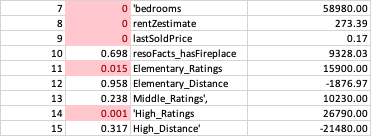

In [370]:
 # [starts from 7 'bedrooms','rentZestimate','lastSoldPrice','resoFacts_hasFireplace','Elementary_Ratings','Elementary_Distance',
  #      'Middle_Ratings', 'High_Ratings','High_Distance' ]